In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from datetime import date
import calendar

In [75]:
import pandas as pd

# data = {
#      'datetime': ['01-01-2011 00:00'],
#      'season': [1],
#      'weather': [0],
#      'holiday': [0],
#      'workingday': [1],
#      'temp': [9.84],
#      'atemp': [14.395],
#      'humidity': [81],
#      'windspeed': [0],
#      'casual': [13],
#      'count': [16],
#      'registered': [13]
#  }
# train_df = pd.DataFrame(data)


#Create the DataFrame
train_df = pd.read_csv('/Users/balamurali/Desktop/ML-P/Dataset/train.csv')

# Convert the 'datetime' column to datetime format
train_df['datetime'] = pd.to_datetime(train_df['datetime'], format='mixed', dayfirst=True)





In [76]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [77]:
train_df.shape

(10886, 12)

In [78]:
train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [79]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [80]:
train_df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [81]:
def change_into_datetime(col):
    train_df[col] = pd.to_datetime(train_df[col])

In [82]:
from datetime import datetime

# Define the correct format that matches your date-time strings
date_format = "%d/%m/%Y %H:%M"

# Convert the 'datetime' column to datetime format with the correct format
train_df['datetime'] = pd.to_datetime(train_df['datetime'], format=date_format)

# Now, you can extract date and time components
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['date'] = train_df['datetime'].dt.date
train_df['hour'] = train_df['datetime'].dt.hour
train_df['day of the week'] = train_df['datetime'].dt.dayofweek

# Check unique years in the 'year' column
unique_years = train_df['year'].unique()


In [83]:
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['date'] = train_df['datetime'].dt.date
train_df['hour'] = train_df['datetime'].dt.hour
train_df['day of the week'] = train_df['datetime'].dt.dayofweek

In [84]:
train_df['year'].unique()

array([2011, 2012], dtype=int32)

In [85]:
dict = {2011 :'1', 2012 :'2'}

In [86]:
train_df['year'] = train_df['year'].map(dict)
train_df['year'].unique()

array(['1', '2'], dtype=object)

**Perfoming Exploratory Data Analysis**

In [87]:
train_df.drop('datetime',axis=1,inplace=True)

In [88]:
train_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,date,hour,day of the week
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,2011-01-01,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011-01-01,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2011-01-01,2,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,2011-01-01,3,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,2011-01-01,4,5


In [89]:
train_df.drop('count',axis=1).describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,month,hour,day of the week
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,6.521495,11.541613,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,3.444373,6.915838,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,4.000000,6.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,7.000000,12.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,10.000000,18.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,12.000000,23.000000,6.000000


# Data Visulization

# Demand wrt to day of the week

/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


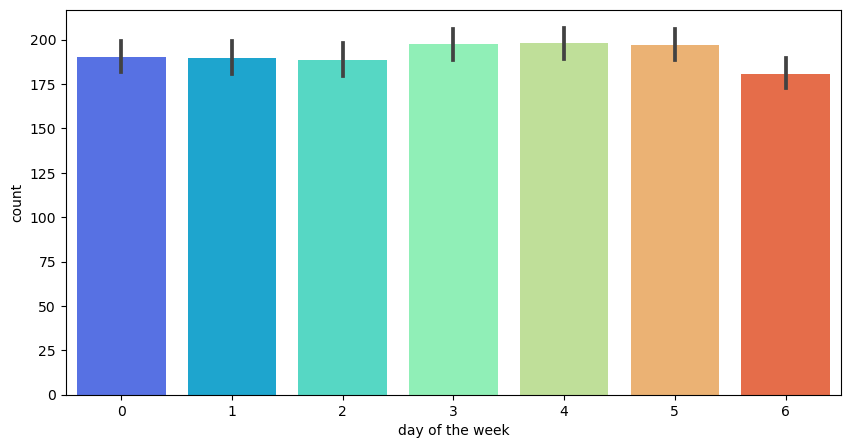

In [90]:
plt.figure(figsize=(10,5))
sns.barplot(data=train_df, x = 'day of the week', y = 'count', palette='rainbow');

# Demand wrt to Month 

/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


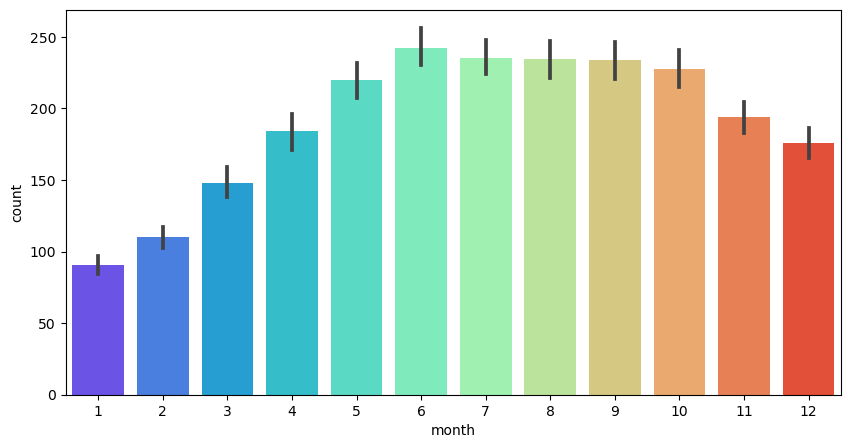

In [91]:
plt.figure(figsize=(10,5))
sns.barplot(data=train_df, x='month', y = 'count', palette = 'rainbow');

# Demand wrt to Hour

/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


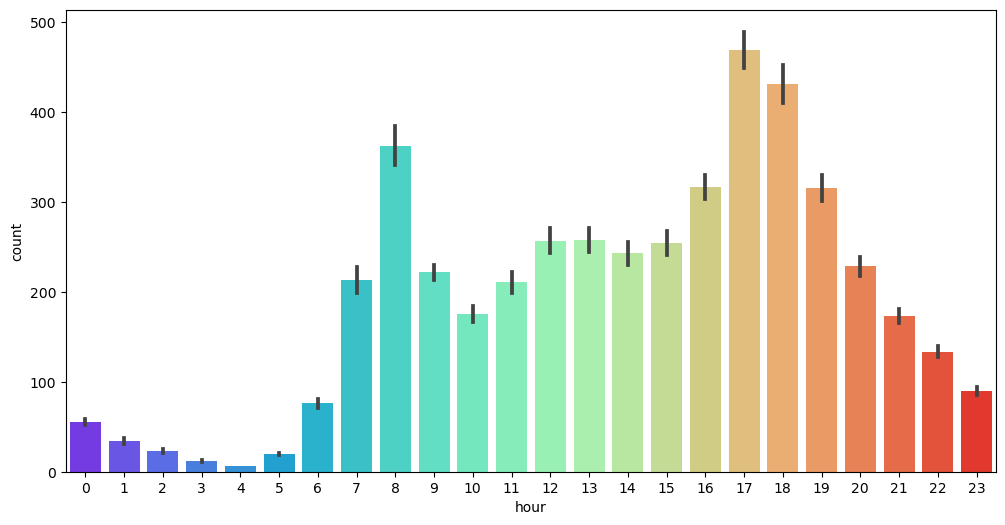

In [92]:
plt.figure(figsize=(12,6))
sns.barplot(data = train_df, x = 'hour', y = 'count', palette = 'rainbow');

# Working day Hour Demand

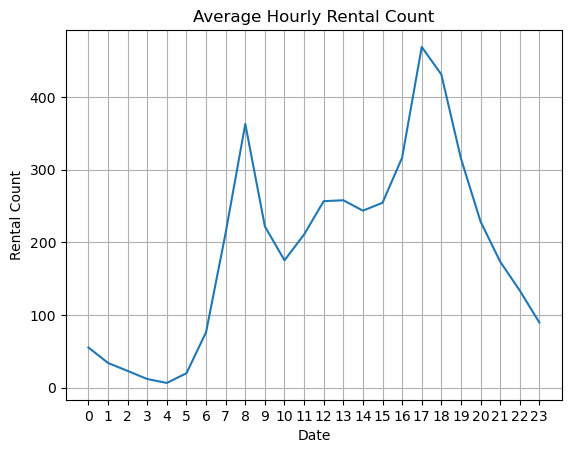

In [93]:
group_hour = train_df.groupby(['hour'])
average_by_hour = group_hour['count'].mean()
plt.plot(average_by_hour.index,average_by_hour)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.xticks(np.arange(24))
plt.grid(True)
plt.title('Average Hourly Rental Count')
plt.show()

# Demand wrt to Season

/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


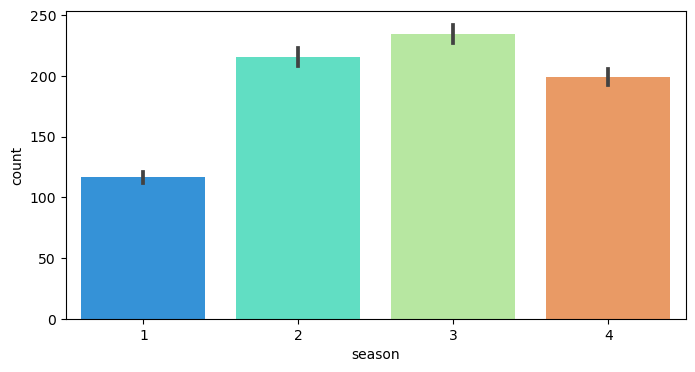

In [94]:
plt.figure(figsize = (8,4))
sns.barplot(data = train_df, x = 'season', y = 'count', palette = 'rainbow');

# Demand wrt to holidays

/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


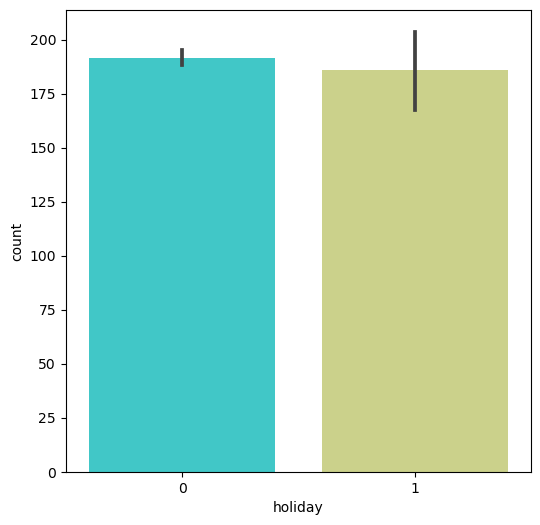

In [95]:
plt.figure(figsize=(6,6))
sns.barplot(data = train_df, x = 'holiday', y = 'count', palette = 'rainbow');

# Demand wrt to working day

/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


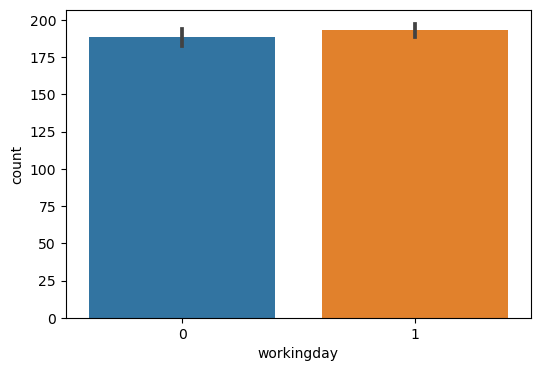

In [96]:
plt.figure(figsize=(6,4))
sns.barplot(data = train_df, x = 'workingday', y = 'count');

# Demand wrt to atemp 

/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


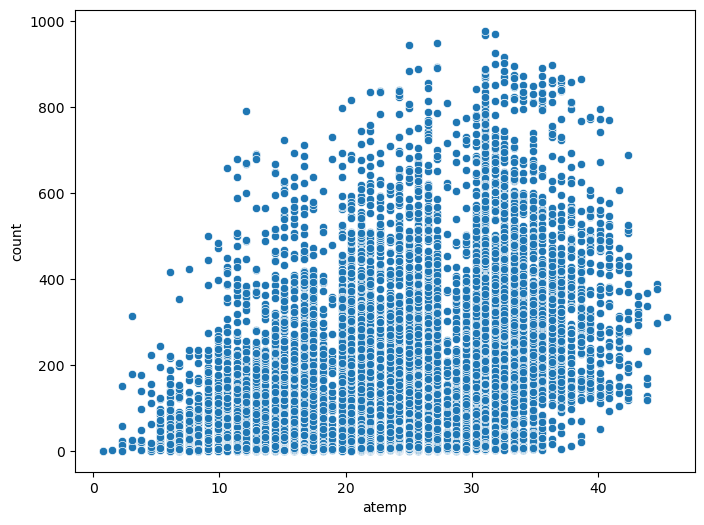

In [97]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = train_df, x = 'atemp', y = 'count');

# Demand wrt to windspeed

/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/balamurali/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


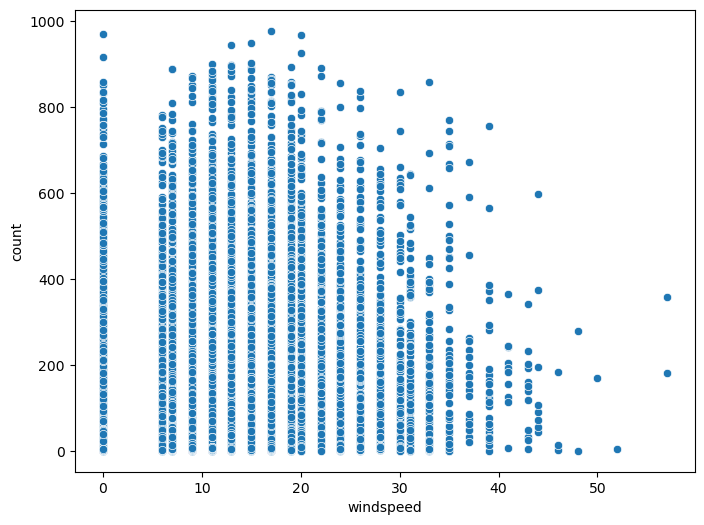

In [98]:

plt.figure(figsize=(8,6))
sns.scatterplot(data = train_df, x = 'windspeed', y='count');

# Data Preprocessing

In [106]:
X = train_df.drop('count',axis=1)

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split

# Read the dataset
train_df = pd.read_csv('/Users/balamurali/Desktop/ML-P/Dataset/train.csv')
X = train_df.drop('count',axis=1)

# Data Preprocessing
date_format = "%d-%m-%Y %H:%M"
train_df['datetime'] = pd.to_datetime(train_df['datetime'], format=date_format)

train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['date'] = train_df['datetime'].dt.date
train_df['hour'] = train_df['datetime'].dt.hour
train_df['day of the week'] = train_df['datetime'].dt.dayofweek

season = pd.get_dummies(train_df['season'], prefix='season', drop_first=True)
weather = pd.get_dummies(train_df['weather'], prefix='weather', drop_first=True)
holiday = pd.get_dummies(train_df['holiday'], prefix='holiday', drop_first=True)
month = pd.get_dummies(train_df['month'], prefix='month', drop_first=True)
hour = pd.get_dummies(train_df['hour'], prefix='hour', drop_first=True)

train_df = pd.concat([train_df, season, weather, holiday, month, hour], axis=1)

train_df.drop(['datetime', 'date', 'day of the week', 'year', 'windspeed', 'workingday', 'season', 'weather', 'holiday', 'month', 'hour'], axis=1, inplace=True)

# Log transform the target variable
y = np.log(train_df['count'])

# Remove the target variable from the feature matrix
X = train_df.drop('count', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



ValueError: time data "01/01/2011 00:00" doesn't match format "%d-%m-%Y %H:%M", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

# Linear Regression(Model 1)

In [101]:
X = train_df.drop('count',axis=1)

In [102]:
X.shape

(10886, 11)

In [103]:
y.shape

NameError: name 'y' is not defined

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

NameError: name 'y' is not defined

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
linear_rg = LinearRegression()

In [110]:
linear_rg.fit(X_train,y_train)

LinearRegression()

In [111]:
preds1 = linear_rg.predict(X_test)
preds1=preds1*10
preds1

array([38.83138288, 44.99605139, 52.22860614, ..., 56.9444116 ,
       54.22788344, 47.41109003])

In [112]:
from sklearn import metrics

In [132]:
from sklearn import metrics

# Assuming preds1 contains the predictions of your linear regression model

# Calculate R2 score
r2_score = metrics.r2_score(y_test, preds1)
print('r2_score is: {}'.format(r2_score))

# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, preds1)
print('MAE: {}'.format(mae))

# Calculate Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, preds1)
print('MSE: {}'.format(mse))

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('RMSE: {}'.format(rmse))


r2_score is: -810.1834702712562
MAE: 40.641385951773366
MSE: 1805.3636037573071
RMSE: 42.48957052921702


# Decision Tree  (Model 2)

In [119]:
from sklearn.tree import DecisionTreeRegressor

In [120]:
dt_rg = DecisionTreeRegressor(max_depth=5)

In [121]:
dt_rg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [122]:
preds2 = dt_rg.predict(X_test)

In [123]:
preds2*10

array([27.0626456 , 46.73629959, 56.19754222, ..., 58.02329027,
       56.19754222, 46.73629959])

In [124]:
r2_score = metrics.r2_score(y_test,preds2)
print('r2_score is:{}'.format(r2_score))

print('MAE:',metrics.mean_absolute_error(y_test,preds2))
print('MSE:',metrics.mean_squared_error(y_test,preds2))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,preds2)))

r2_score is:0.9908604605427012
MAE: 0.1132707691870943
MSE: 0.02034088772271647
RMSE: 0.14262148408538058


# KNearest Neighbor (Model 3)

In [125]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [126]:
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn = GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_knn.fit(X_train,y_train)
preds3 = clf_knn.predict(X_test)

In [127]:
preds3*10

array([26.07204174, 47.83907973, 54.51454611, ..., 58.93107075,
       55.19816285, 47.87201821])

In [128]:
r2_score = metrics.r2_score(y_test,preds3)
print('r2_score is:{}'.format(r2_score))

print('MAE:',metrics.mean_absolute_error(y_test,preds3))
print('MSE:',metrics.mean_squared_error(y_test,preds3))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,preds3)))

r2_score is:0.9918895850875309
MAE: 0.0523164514453903
MSE: 0.018050476163482484
RMSE: 0.1343520605107435


# Random Forest (Model 4)

In [129]:
from sklearn.ensemble import RandomForestRegressor

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Your other hyperparameters
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': [None, 'sqrt', 'log2'],  # Replace 'auto' with a valid value
    'random_state': [42]
}


# Create a RandomForestRegressor
rf_model = RandomForestRegressor()

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_model, param_distributions=param_dist,
    n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42
)

# Fit the model
rf_model.fit(X_train, y_train)
preds4 = rf_model.predict(X_test)
preds4=preds4*10
preds4


array([27.48064084, 47.79965618, 54.65896629, ..., 58.91431041,
       55.43541516, 47.68022386])

In [131]:
r2_score = metrics.r2_score(y_test,preds3)
print('r2_score is:{}'.format(r2_score*100))

print('MAE:',metrics.mean_absolute_error(y_test,preds4))
print('MSE:',metrics.mean_squared_error(y_test,preds3
                                       ))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,preds3)))

r2_score is:99.18895850875309
MAE: 40.61648214463798
MSE: 0.018050476163482484
RMSE: 0.1343520605107435
